Corrente Primária (I_p): 4.55 A
Corrente Secundária (I_s): 41.67 A
Número de Espiras do Primário (N_p): 6606.61
Número de Espiras do Secundário (N_s): 720.72


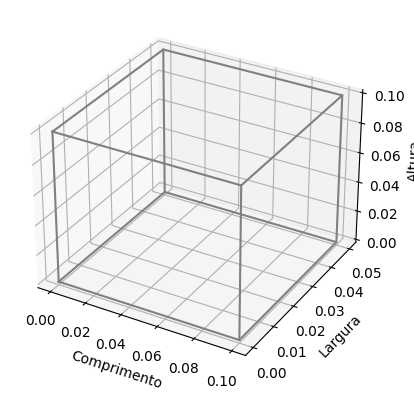

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dados de entrada
V_p = 220  # Volts
V_s = 24   # Volts
P = 1000   # VA
f = 50     # Hz
B_max = 1.5  # Tesla (valor típico)

# Cálculos
I_p = P / V_p
I_s = P / V_s

# Número de espiras (assumindo uma área de seção transversal A_e)
A_e = 0.0001  # m^2 (valor exemplo)
N_p = V_p / (4.44 * f * B_max * A_e)
N_s = V_s / (4.44 * f * B_max * A_e)

# Exibir resultados
print(f"Corrente Primária (I_p): {I_p:.2f} A")
print(f"Corrente Secundária (I_s): {I_s:.2f} A")
print(f"Número de Espiras do Primário (N_p): {N_p:.2f}")
print(f"Número de Espiras do Secundário (N_s): {N_s:.2f}")

# Visualização 3D do núcleo do transformador
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dimensões do núcleo (valores exemplo)
core_length = 0.1  # m
core_width = 0.05  # m
core_height = 0.1  # m

# Desenhar o núcleo
x = np.array([0, core_length, core_length, 0, 0])
y = np.array([0, 0, core_width, core_width, 0])
z = np.array([0, 0, 0, 0, 0])

ax.plot3D(x, y, z, 'gray')
ax.plot3D(x, y, z + core_height, 'gray')
ax.plot3D([0, 0], [0, 0], [0, core_height], 'gray')
ax.plot3D([core_length, core_length], [0, 0], [0, core_height], 'gray')
ax.plot3D([core_length, core_length], [core_width, core_width], [0, core_height], 'gray')
ax.plot3D([0, 0], [core_width, core_width], [0, core_height], 'gray')

ax.set_xlabel('Comprimento')
ax.set_ylabel('Largura')
ax.set_zlabel('Altura')

plt.show()


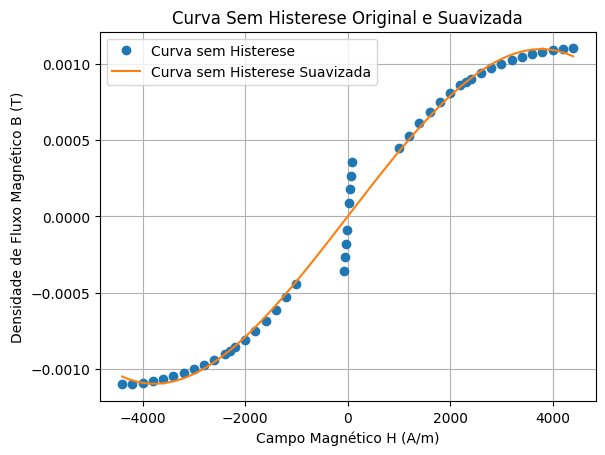

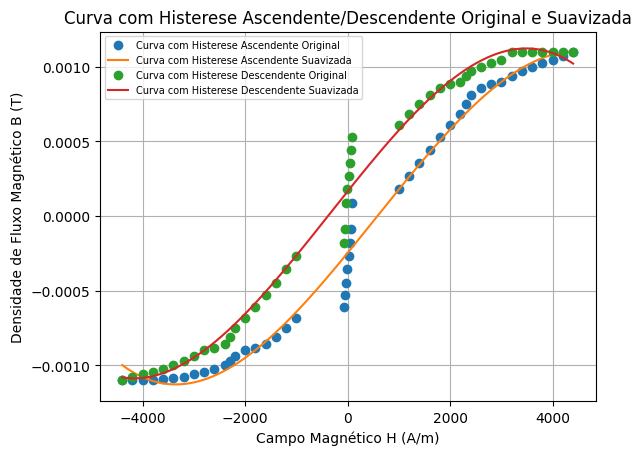

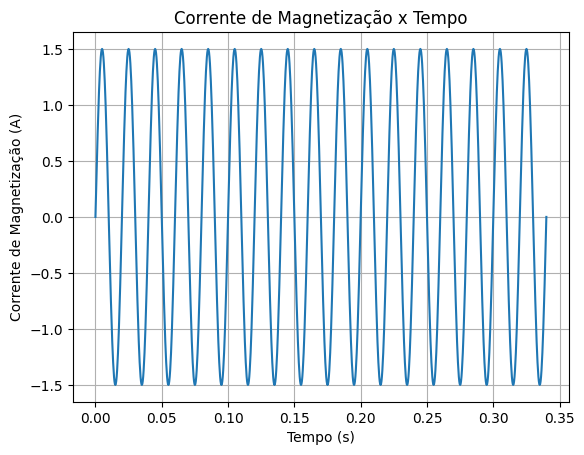

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Carregar dados do arquivo Excel
mag_curve_data = pd.read_excel('MagCurve.xlsx')

# Supondo que o arquivo contém colunas 'H' e 'B', 'A', 'D', 'Z'
H = mag_curve_data['H'].values
B = mag_curve_data['B'].values
A = mag_curve_data['A'].values
D = mag_curve_data['D'].values

# Verificar e remover valores infinitos ou NaN sem hiterese
finite_mask = np.isfinite(H) & np.isfinite(B)
H = H[finite_mask]
B = B[finite_mask]

# Verificar e remover valores infinitos ou NaN ascendente
finite_mask = np.isfinite(H) & np.isfinite(A)
H = H[finite_mask]
A = A[finite_mask]

# Verificar e remover valores infinitos ou NaN descendente
finite_mask = np.isfinite(H) & np.isfinite(D)
H = H[finite_mask]
D = D[finite_mask]

# Criar a interpolação univariada para suavização sem histerese
spline = UnivariateSpline(H, B, s=1)
H_smooth = np.linspace(H.min(), H.max(), 500)  # Valores de H suavizados
B_smooth = spline(H_smooth)

# Criar a interpolação univariada para suavização ascendente
spline = UnivariateSpline(H, A, s=1)
H_smooth = np.linspace(H.min(), H.max(), 500)  # Valores de H suavizados
A_smooth = spline(H_smooth)

# Criar a interpolação univariada para suavização descendente
spline = UnivariateSpline(H, D, s=1)
H_smooth = np.linspace(H.min(), H.max(), 500)  # Valores de z suavizados
D_smooth = spline(H_smooth)

# Plotar a curva Sem Histerese original e a suavizada
plt.figure()
plt.plot(H, B, 'o', label='Curva sem Histerese')  # Dados originais
plt.plot(H_smooth, B_smooth, label='Curva sem Histerese Suavizada')  # Dados suavizados
plt.xlabel('Campo Magnético H (A/m)')
plt.ylabel('Densidade de Fluxo Magnético B (T)')
plt.title('Curva Sem Histerese Original e Suavizada')
plt.grid(True)
plt.legend()
plt.show()


# Plotar a curva com Histerese Ascendente original e a suavizada
plt.figure()
plt.plot(H, A, 'o', label='Curva com Histerese Ascendente Original')  # Dados originais
plt.plot(H_smooth, A_smooth, label='Curva com Histerese Ascendente Suavizada')  # Dados suavizados
plt.plot(H, D, 'o', label='Curva com Histerese Descendente Original')  # Dados originais
plt.plot(H_smooth, D_smooth, label='Curva com Histerese Descendente Suavizada')  # Dados suavizados
plt.xlabel('Campo Magnético H (A/m)')
plt.ylabel('Densidade de Fluxo Magnético B (T)')
plt.title('Curva com Histerese Ascendente/Descendente Original e Suavizada')
plt.grid(True)
plt.legend(fontsize=7)
plt.show()

# Calcular e plotar corrente de magnetização
t = np.arange(0, 340e-3, 1/3000)  # Tempo de 0 a 340 ms com passo de 1/3000 s
I_m = B_max * np.sin(2 * np.pi * f * t)  # Corrente de magnetização

plt.figure()
plt.plot(t, I_m)
plt.xlabel('Tempo (s)')
plt.ylabel('Corrente de Magnetização (A)')
plt.title('Corrente de Magnetização x Tempo')
plt.grid(True)
plt.show()



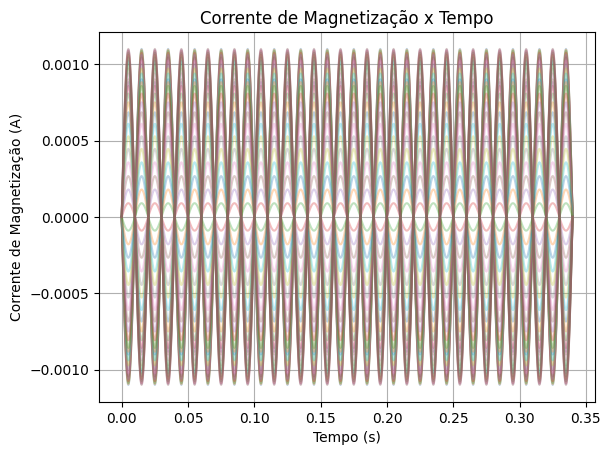

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar dados do arquivo Excel
mag_curve_data = pd.read_excel('MagCurve.xlsx')

# Supondo que o arquivo contém colunas 'H' e 'B'
H = mag_curve_data['H'].values
B = mag_curve_data['B'].values

# Parâmetros
f = 50  # Frequência em Hz

# Tempo de 0 a 340 ms com passo de 1/3000 s
t = np.arange(0, 340e-3, 1/3000)

# Inicializar lista para armazenar as correntes de magnetização
I_m_list = []

# Calcular a corrente de magnetização para cada valor de B
for B_max in B:
    I_m = B_max * np.sin(2 * np.pi * f * t)
    I_m_list.append(I_m)

# Converter a lista para um array numpy para facilitar a plotagem
I_m_array = np.array(I_m_list)

# Plotar as correntes de magnetização
plt.figure()
for I_m in I_m_array:
    plt.plot(t, I_m, alpha=0.3)  # Usar alpha para sobrepor várias curvas

plt.xlabel('Tempo (s)')
plt.ylabel('Corrente de Magnetização (A)')
plt.title('Corrente de Magnetização x Tempo')
plt.grid(True)
plt.show()